# 1. The LASSO and Boosting for Regression

In [1]:
import numpy as np
import math
import seaborn as sns
import os
import pandas as pd
from sklearn.impute import SimpleImputer
from numpy import nan
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import KFold
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import javabridge
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
import weka.core.jvm as jvm
import weka.core.converters as converters
from weka.core.classes import Random
import weka.core.converters as Loader
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.classifiers import Classifier
import weka.plot.classifiers as plcls
from imblearn.over_sampling import SMOTE
import weka.core.packages as packages

In [3]:
os.chdir('../data/')

(a) Download the Communities and Crime data

In [3]:
title = ['state','county','community','communityname','fold','population','householdsize',
         'racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24',
         'agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc',
         'pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap',
         'indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade',
         'PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ',
         'PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
         'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
         'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent',
         'PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8',
         'PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup',
         'PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous',
         'PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc',
        'PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb',
         'OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent',
         'MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet',
         'PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85',
         'LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq',
         'LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite',
         'PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits',
         'NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars',
         'PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop',
         'ViolentCrimesPerPop']

table = pd.read_table('communities.data',sep=',',names=title)
table

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [5]:
train = table[0:1495]
test = table[1495:]
test.reset_index(drop=True, inplace=True)
test

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,6,?,?,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,?,?,?,?,0.00,?,0.12
1,48,?,?,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
2,35,?,?,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
3,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
4,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
495,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
496,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
497,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


(b) Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features

In [6]:
train.drop(['state','county','community','communityname','fold'],axis=1, inplace=True)
test.drop(['state','county','community','communityname','fold'],axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
train_num = train.replace("?",nan)
test_num = test.replace('?',nan)
train_mean = SimpleImputer(missing_values=nan, strategy='mean')
train_mean = train_mean.fit_transform(train_num)
print()
train_col = train_num.columns
train_data = pd.DataFrame(train_mean, columns=train_col)
train_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [8]:
test_mean = SimpleImputer(missing_values=nan, strategy='mean')
test_mean = test_mean.fit_transform(test_num)
test_col = test_num.columns
test_data = pd.DataFrame(test_mean, columns=test_col)
test_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.0800,0.060000,0.780000,0.00000,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.0200,0.020000,0.790000,0.00000,0.22,0.180,0.19


(c) Plot a correlation matrix for the features in the data set.

In [9]:
y_train = train_data[["ViolentCrimesPerPop"]]
y_train

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1490,0.03
1491,0.20
1492,0.30
1493,0.03


In [10]:
x_train = train_data.drop('ViolentCrimesPerPop', axis=1)
x_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


In [11]:
y_test = test_data[["ViolentCrimesPerPop"]]
y_test
x_test = test_data.drop('ViolentCrimesPerPop', axis=1)
x_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.253375,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.00,0.208
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.253375,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.00,0.208
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.253375,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.00,0.208
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.253375,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.00,0.208
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.253375,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.00,0.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.253375,0.01,0.28,0.05,0.1605,0.065375,0.655375,0.40625,0.00,0.208
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.253375,0.02,0.37,0.20,0.1605,0.065375,0.655375,0.40625,0.00,0.208
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.250000,0.08,0.32,0.18,0.0800,0.060000,0.780000,0.00000,0.91,0.280
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.190000,0.03,0.38,0.33,0.0200,0.020000,0.790000,0.00000,0.22,0.180


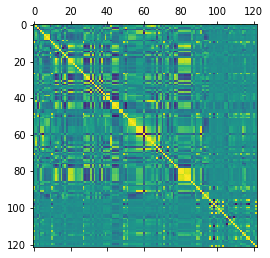

In [12]:
plt.matshow(x_train.corr())

(d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in
which s is sample standard deviation and m is sample mean.

In [13]:
cv = {}
for i in x_train.columns:
    std = np.std(x_train[i])
    mean = np.mean(x_train[i])
    num = std / mean
    cv[i] = num
cv

{'population': 2.2403549658791597,
 'householdsize': 0.35568054998665144,
 'racepctblack': 1.4284074506092626,
 'racePctWhite': 0.3301022059521659,
 'racePctAsian': 1.3586450597327822,
 'racePctHisp': 1.6115517541662496,
 'agePct12t21': 0.3689596593902993,
 'agePct12t29': 0.2912173646346089,
 'agePct16t24': 0.5001425558175222,
 'agePct65up': 0.41263790059202093,
 'numbUrban': 2.0377796181745684,
 'pctUrban': 0.6431029790755556,
 'medIncome': 0.5917801462174829,
 'pctWWage': 0.32850413414993196,
 'pctWFarmSelf': 0.7016630853607417,
 'pctWInvInc': 0.3652123768258215,
 'pctWSocSec': 0.36059478571863646,
 'pctWPubAsst': 0.7059696656048582,
 'pctWRetire': 0.34530541203430976,
 'medFamInc': 0.5404892966681876,
 'perCapInc': 0.5578927727889993,
 'whitePerCap': 0.5196545822676161,
 'blackPerCap': 0.5991400633159214,
 'indianPerCap': 0.8180943789334159,
 'AsianPerCap': 0.6146598515430145,
 'OtherPerCap': 0.6729964266659633,
 'HispPerCap': 0.48390602773265157,
 'NumUnderPov': 2.341659559375282,


(e) pick sqrt(128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [14]:
a = int(np.sqrt(128))
sortingcv = sorted(cv.items(),key=lambda x:x[1], reverse=True)
highest = sortingcv[:a]
print(highest)

[('NumStreet', 4.291486989120427), ('NumInShelters', 3.469791091959164), ('NumIlleg', 3.0579411110718238), ('NumImmig', 2.9256562747791404), ('LemasPctOfficDrugUn', 2.552091540968869), ('NumUnderPov', 2.341659559375282), ('population', 2.2403549658791597), ('numbUrban', 2.0377796181745684), ('HousVacant', 1.967808588822629), ('LandArea', 1.6448574645279186), ('racePctHisp', 1.6115517541662496)]


In [15]:
highest_var = []
for b in range(0,a,1):
    highest_var.append(list(highest[b])[0])
print(highest_var)
high_data = x_train[highest_var]
high_data

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.02,0.07
1491,0.03,0.09,0.04,0.15,0.61,0.08,0.16,0.18,0.06,0.07,0.42
1492,0.00,0.00,0.03,0.00,0.00,0.04,0.01,0.00,0.05,0.03,0.01
1493,0.00,0.00,0.00,0.01,0.00,0.01,0.06,0.07,0.02,0.08,0.01


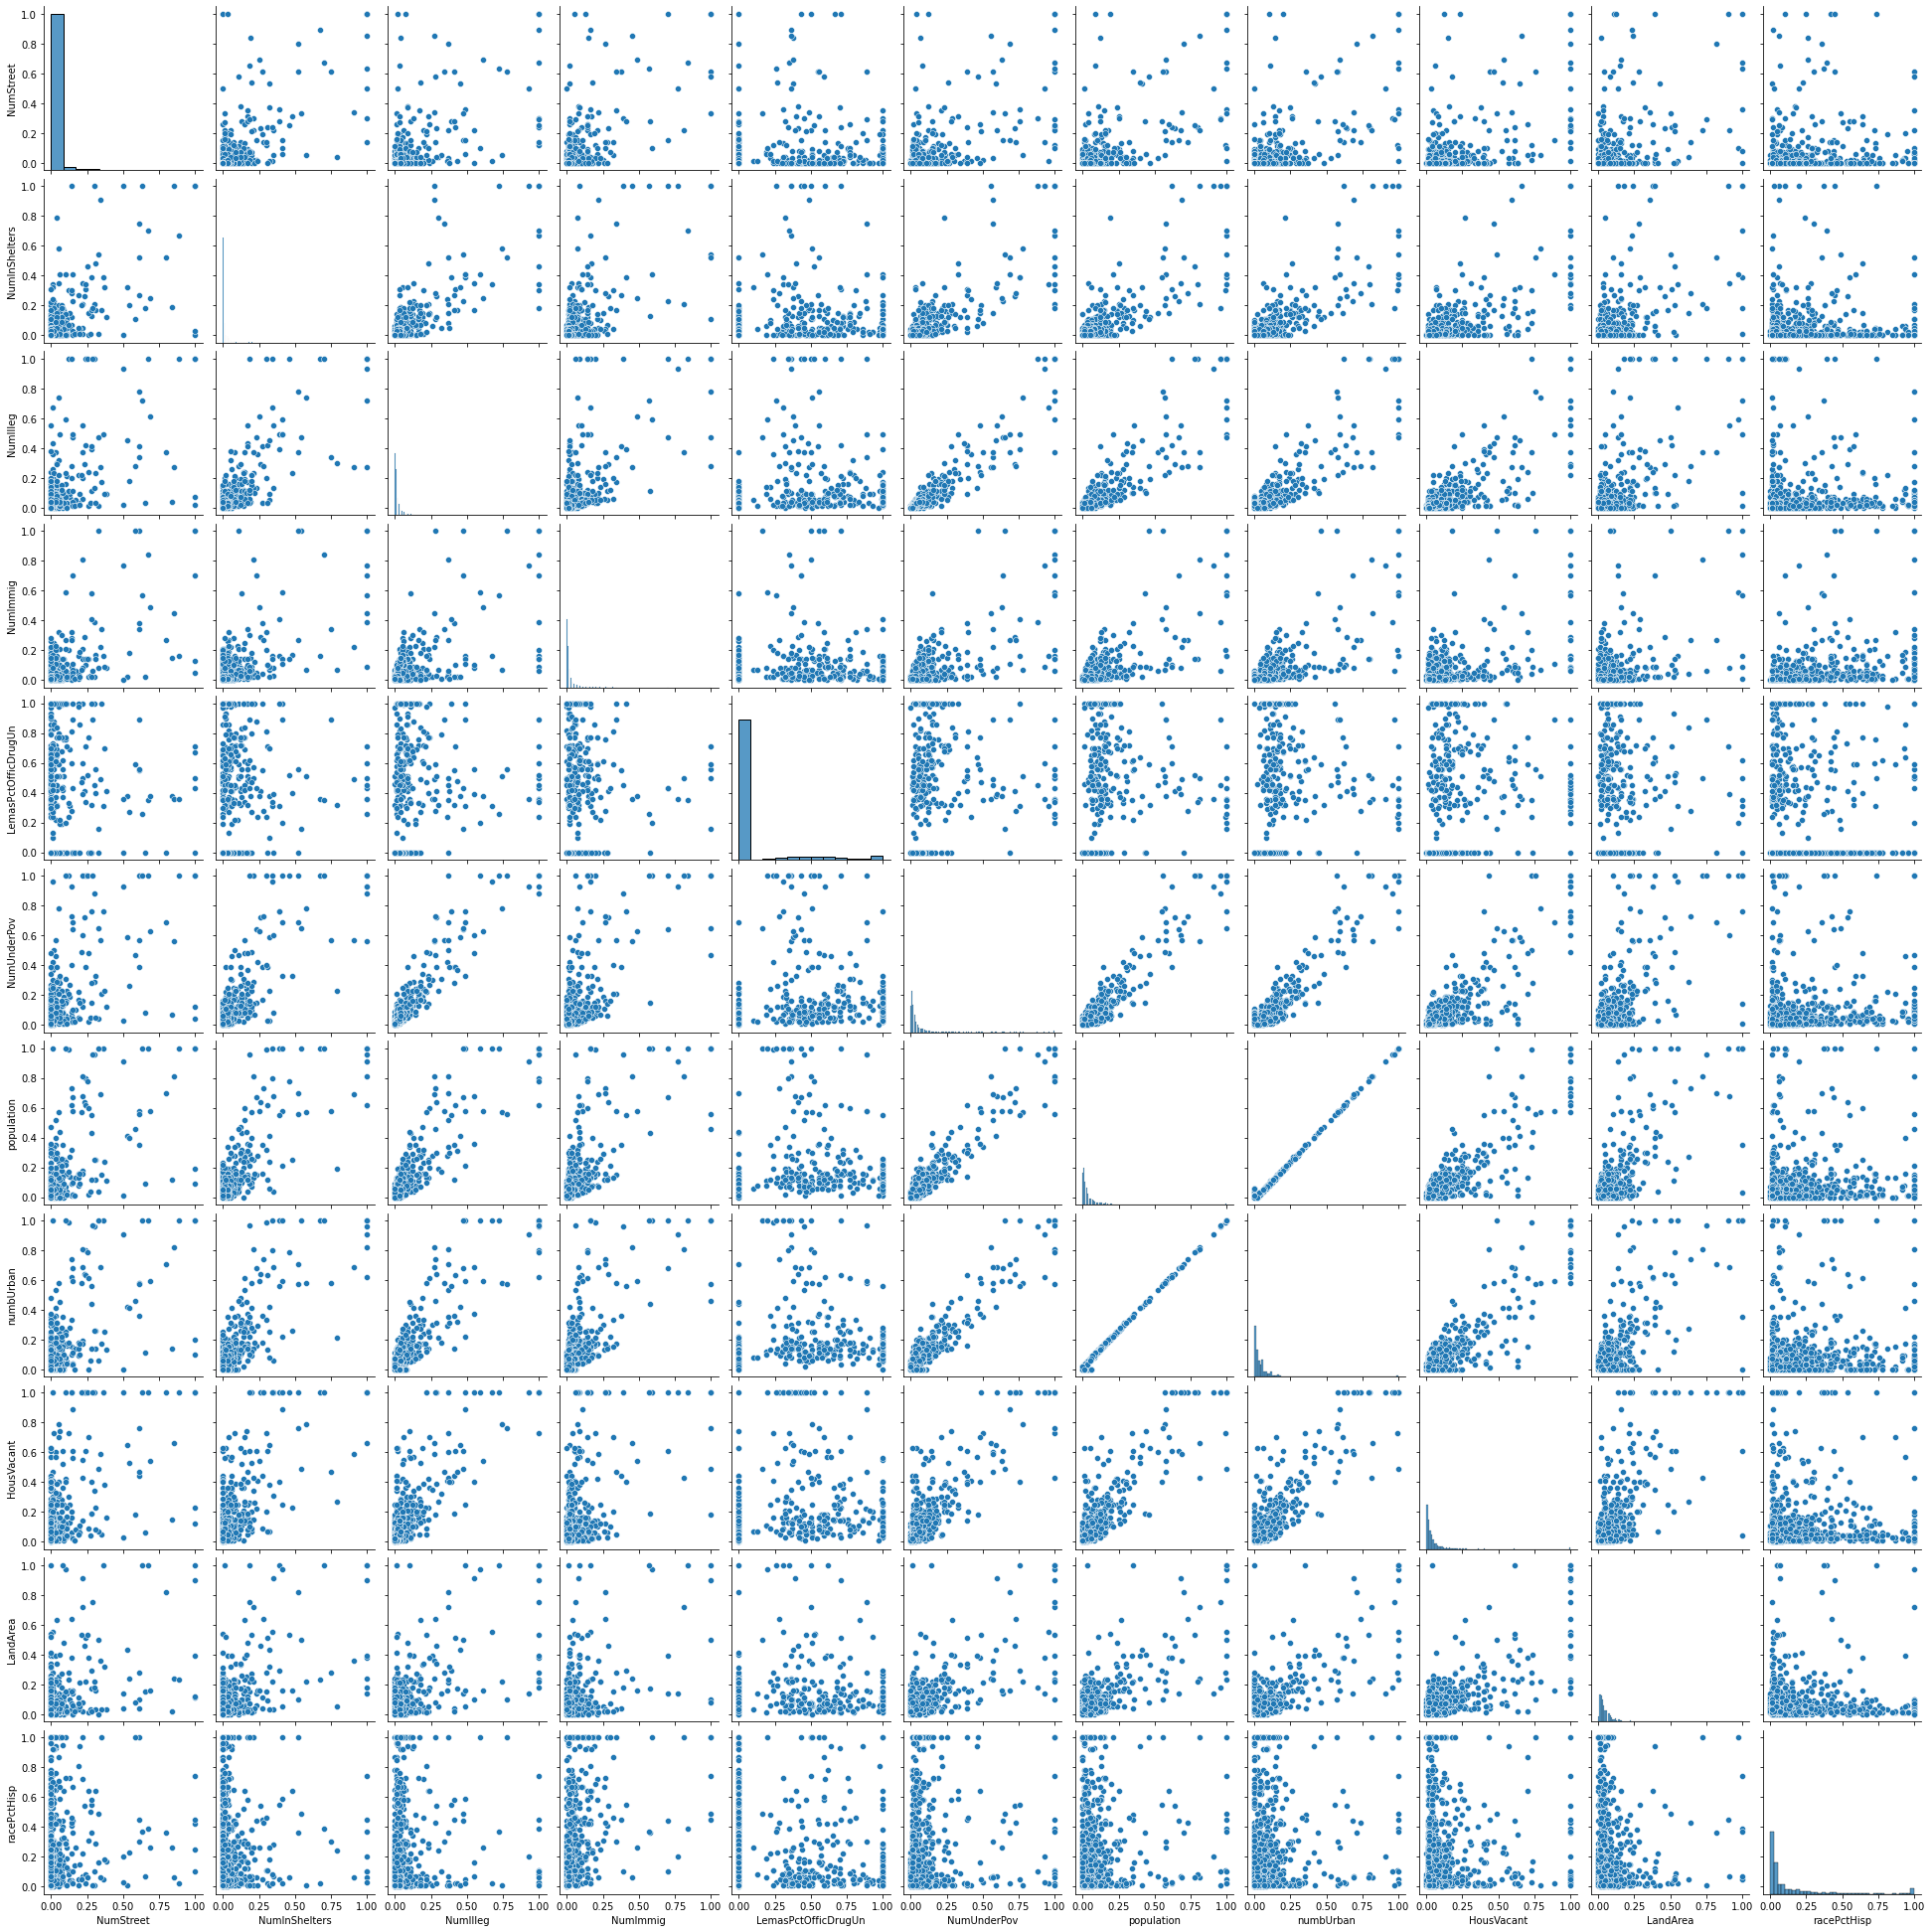

In [16]:
sns.pairplot(high_data)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumStreet'>

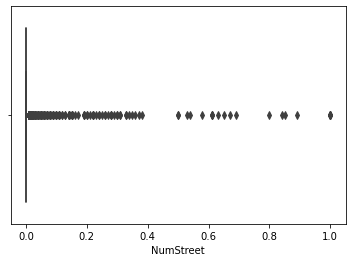

In [17]:
#for i in range(0,11,1):
sns.boxplot(high_data[highest_var[0]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumInShelters'>

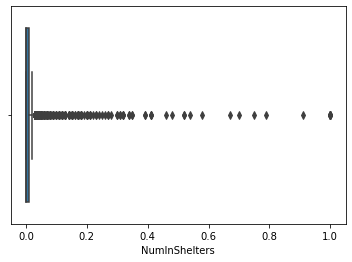

In [18]:
sns.boxplot(high_data[highest_var[1]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumIlleg'>

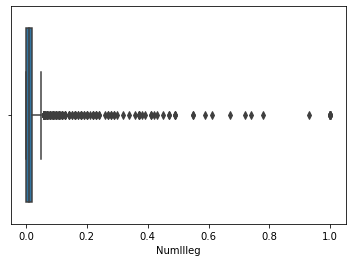

In [19]:
sns.boxplot(high_data[highest_var[2]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumImmig'>

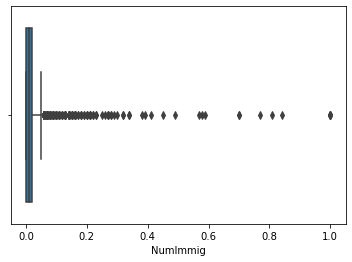

In [20]:
sns.boxplot(high_data[highest_var[3]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LemasPctOfficDrugUn'>

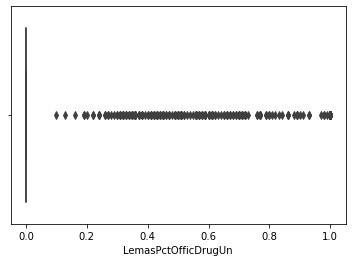

In [21]:
sns.boxplot(high_data[highest_var[4]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumUnderPov'>

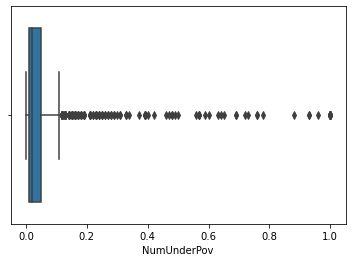

In [22]:
sns.boxplot(high_data[highest_var[5]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

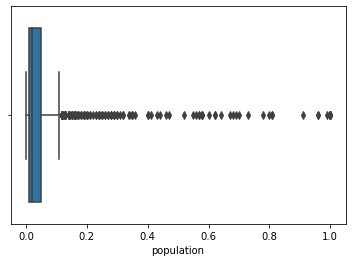

In [23]:
sns.boxplot(high_data[highest_var[6]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='numbUrban'>

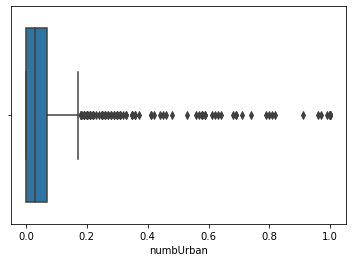

In [24]:
sns.boxplot(high_data[highest_var[7]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HousVacant'>

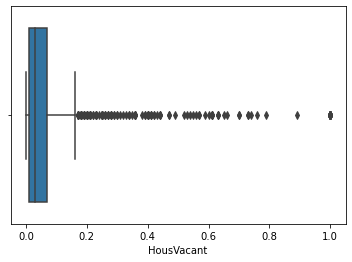

In [25]:
sns.boxplot(high_data[highest_var[8]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandArea'>

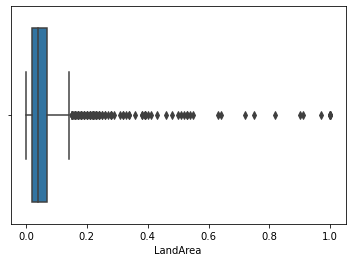

In [26]:
sns.boxplot(high_data[highest_var[9]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='racePctHisp'>

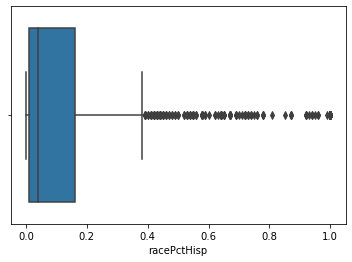

In [27]:
sns.boxplot(high_data[highest_var[10]])

No, I can't draw conclusions about significance of those features just by the scatter plots

(f) Fit a linear model using least squares to the training set and report the test error.

In [28]:
lr = LinearRegression()
lreg = lr.fit(x_train,y_train)
y_predict = lreg.predict(x_test)
mean_squared_error(y_test,y_predict)

4.246424129307514e+17

(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [29]:
#scl = StandardScaler()
#scl.fit(x_train)
#x_train_data = scl.transform(x_train)
#scl2 = StandardScaler()
#scl2.fit(x_test)
#x_test_data = scl2.transform(x_test)
#scl.fit_transform(x_train)
#rid = RidgeCV(cv=10, normalize=False).fit(x_train_data, y_train)
rid = RidgeCV(cv=10, normalize=False).fit(x_train, y_train)
rid_err = 1-rid.score(x_test, y_test)
print('ridge test error: %f' %rid_err)

ridge test error: 0.372697


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized2 features. Report the test error for both cases and compare them.

In [30]:
las = LassoCV(cv=10,normalize=False).fit(x_train, y_train)
las_err = 1 - las.score(x_test,y_test)
print('lasso test error: %f without standardized' %las_err)

scl = StandardScaler().fit(x_train)
x_train_stand = scl.transform(x_train)
scl2 = StandardScaler().fit(x_test)
x_test_stand = scl2.transform(x_test)
#scl2.fit_transform(x_train)
las2 = LassoCV(cv=10, normalize=False).fit(x_train_stand, y_train)
las_err_stand = 1 - las2.score(x_test_stand, y_test)
print('lasso test error: %f with standardized' %las_err_stand)

select = SelectFromModel(las).fit(x_train, y_train)
tf_index = select.get_support()
#print(select.get_support())
feature_1 = []
for i, j in enumerate(x_train.columns):
    if tf_index[i] == True:
        feature_1.append(j)
print('first model without standardized:')
print(feature_1)

select_2 = SelectFromModel(las2).fit(x_train, y_train)
tf_index_2 = select_2.get_support()
feature_2 = []
for a, b in enumerate(x_train.columns):
    if tf_index_2[a] == True:
        feature_2.append(b)
print('second model with standardized:')
print(feature_2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


lasso test error: 0.373236 without standardized


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010070705961709336, tolerance: 0.0076108375910780655
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01080302185883042, tolerance: 0.007474577130111527
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did

lasso test error: 0.379192 with standardized
first model without standardized:
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelter

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


second model with standardized:
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSame

(i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [31]:
pca = PCA()
x_reduced_train = pca.fit_transform(scale(x_train))
regr = LinearRegression()
cv = KFold(n_splits = 10)
mse = []
for a in np.arange(1,123):
    score = -1*model_selection.cross_val_score(regr,
           x_reduced_train[:,:a], y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()
    mse.append(score)

94


Text(0, 0.5, 'MSE')

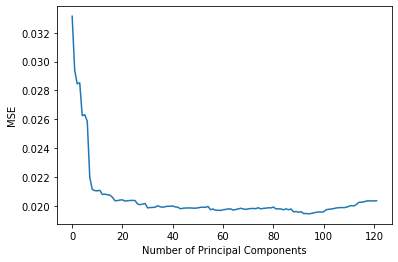

In [32]:
print(mse.index(min(mse)))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')

In [33]:
pca2 = PCA()
x_reduced_test = pca2.fit_transform(scale(x_test))[:,:95]
regr = LinearRegression()
regr.fit(x_reduced_train[:,:95], y_train)
y_pred = regr.predict(x_reduced_test)
mean_squared_error(y_test, y_pred)

0.026288706657774115

(j) fit a boosting tree to the data. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [34]:
alpha = 10**np.linspace(10, -2, num=50)*0.5
alpha_mse = {}
for a in alpha:
    xg = xgboost.XGBRegressor(reg_alpha = a)
    xg.fit(x_train,y_train)
    y_pred = xg.predict(x_test)
    error = mean_squared_error(y_test,y_pred)
    alpha_mse[a] = error
print(alpha_mse)

{5000000000.0: 0.12040120240480963, 2844933014.5091524: 0.12040120240480963, 1618728771.40882: 0.12040120240480963, 921034984.6633582: 0.12040120240480963, 524056567.0773437: 0.12040120240480963, 298181165.8297318: 0.12040120240480963, 169661088.5947665: 0.12040120240480963, 96534886.44416268: 0.12040120240480963, 54927057.09937786: 0.12040120240480963, 31252759.62636988: 0.12040120240480963, 17782401.531115644: 0.12040120240480963, 10117948.238625778: 0.12040120240480963, 5756976.996632241: 0.12040120240480963, 3275642.7842977545: 0.12040120240480963, 1863796.860157469: 0.12040120240480963, 1060475.4439600962: 0.12040120240480963, 603396.3203196644: 0.12040120240480963, 343324.4225021499: 0.12040120240480963, 195346.99685273104: 0.12040120240480963, 111149.82412630977: 0.12040120240480963, 63242.76084276479: 0.12040120240480963, 35984.283650057645: 0.12040120240480963, 20474.575311902136: 0.12040120240480963, 11649.75905257686: 0.12040120240480963, 6628.556827950554: 0.120401202404809

# 2. Tree-Based Methods

(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.

In [4]:
train_2 = pd.read_csv('aps_failure_training_set.csv', skiprows = 20)
test_2 = pd.read_csv('aps_failure_test_set.csv', skiprows = 20)
test_2

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


(b) i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [5]:
y_train_2 = train_2[['class']]
x_train_2 = train_2.drop('class',axis=1)
x_train_2 = x_train_2.replace('na', np.nan)
mean = SimpleImputer(missing_values=nan, strategy='mean')

In [6]:
y_test_2 = test_2[['class']]
x_test_2 = test_2.drop('class',axis=1)
x_test_2 = x_test_2.replace('na', np.nan)
mean = SimpleImputer(missing_values=nan, strategy='mean')

In [7]:
x_trans = mean.fit_transform(x_train_2)
x_train_2 = pd.DataFrame(x_trans, columns=x_train_2.columns)
x_train_2

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [8]:
x_trans_test = mean.fit_transform(x_test_2)
x_test_2 = pd.DataFrame(x_trans_test, columns=x_train_2.columns)
x_test_2

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


(b) ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.

In [9]:
cv = {}
for i in x_train_2.columns:
    std = np.std(x_train_2[i])
    mean = np.mean(x_train_2[i])
    num = std / mean
    cv[i] = num
cv

{'aa_000': 2.450917153379079,
 'ab_000': 2.3283805836177702,
 'ac_000': 2.1697484418139323,
 'ad_000': 183.8460882991141,
 'ae_000': 23.190743406968053,
 'af_000': 18.65876560436062,
 'ag_000': 91.87779897147188,
 'ag_001': 34.854659618594006,
 'ag_002': 17.368998661424822,
 'ag_003': 8.549977775999249,
 'ag_004': 5.401433682911794,
 'ag_005': 2.9270676898901256,
 'ag_006': 2.3449075291972563,
 'ag_007': 2.833460478469983,
 'ag_008': 6.154531790145528,
 'ag_009': 32.98407617059891,
 'ah_000': 2.3001680803073827,
 'ai_000': 18.01253163815488,
 'aj_000': 43.801457366011356,
 'ak_000': 74.52606690027996,
 'al_000': 9.074295202585027,
 'am_0': 9.058596116868644,
 'an_000': 2.238778117662783,
 'ao_000': 2.2601302821582165,
 'ap_000': 3.0591388134967334,
 'aq_000': 2.8395880298360754,
 'ar_000': 10.836959393081017,
 'as_000': 86.4161836966494,
 'at_000': 23.45922929479404,
 'au_000': 68.15998600570832,
 'av_000': 5.7787367533464895,
 'ax_000': 3.8775360254410027,
 'ay_000': 37.00925391275805

(b) iii. Plot a correlation matrix for your features using pandas or any other tool.

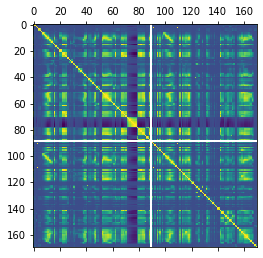

In [9]:
plt.matshow(x_train_2.corr())

(b) iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [11]:
a = int(np.sqrt(170))
sortingcv = sorted(cv.items(),key=lambda x:x[1], reverse=True)
highest = sortingcv[:a]
print(highest)
highest_var = []
for b in range(0,a,1):
    highest_var.append(list(highest[b])[0])
print(highest_var)
high_data = x_train_2[highest_var]
high_data

[('cs_009', 235.2756439554245), ('cf_000', 184.23155690901163), ('co_000', 183.94748454109805), ('ad_000', 183.8460882991141), ('dh_000', 114.98403263787199), ('dj_000', 109.64637120769159), ('ag_000', 91.87779897147188), ('as_000', 86.4161836966494), ('ay_009', 83.78536478848595), ('az_009', 76.96733666109884), ('ak_000', 74.52606690027996), ('au_000', 68.15998600570832), ('ch_000', 58.26774309169662)]
['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [12]:
df_new = pd.DataFrame()
for i in highest_var:
    df_new = high_data[high_data < 1e6]
df_new

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


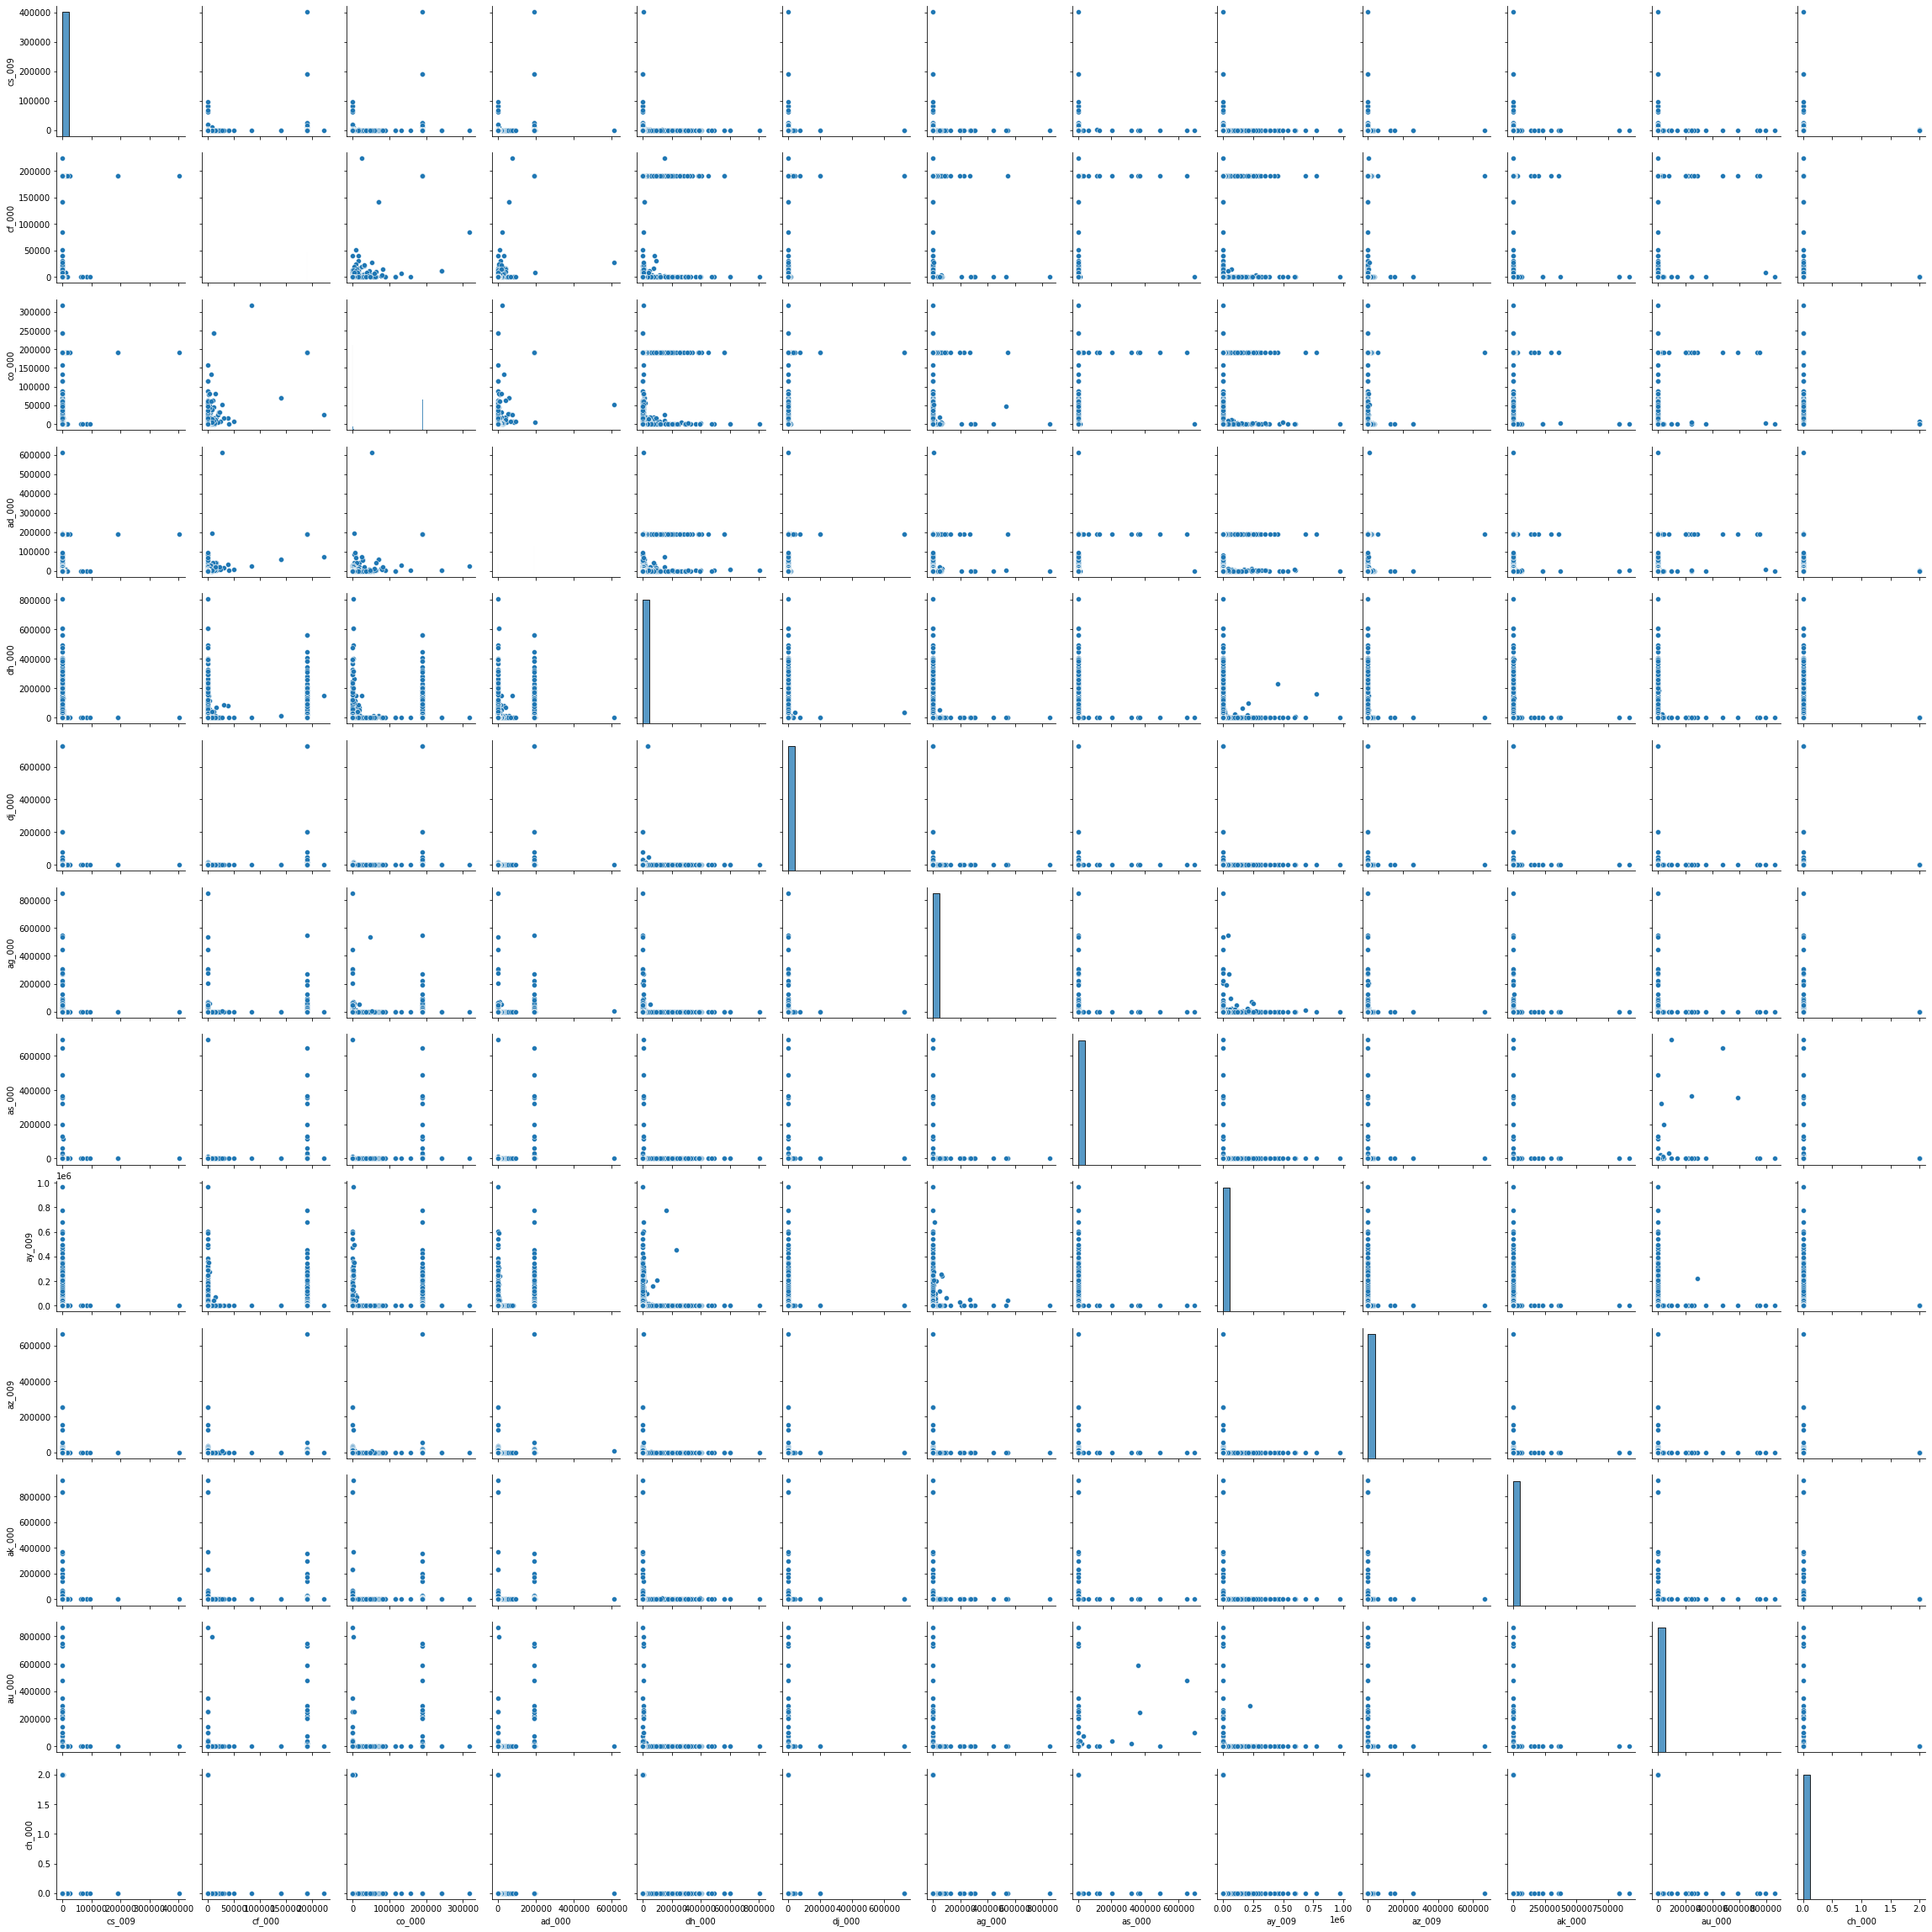

In [28]:
sns.pairplot(df_new)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cs_009'>

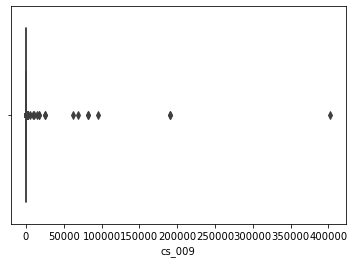

In [29]:
#sns.boxplot(high_data[highest_var[0]])
sns.boxplot(df_new[highest_var[0]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cf_000'>

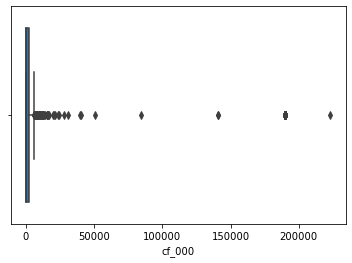

In [14]:
#sns.boxplot(high_data[highest_var[1]])
sns.boxplot(df_new[highest_var[1]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='co_000'>

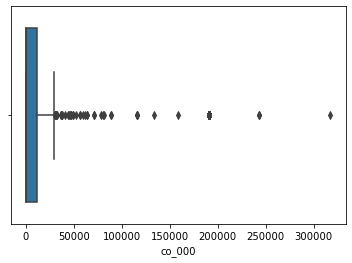

In [30]:
#sns.boxplot(high_data[highest_var[2]])
sns.boxplot(df_new[highest_var[2]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ad_000'>

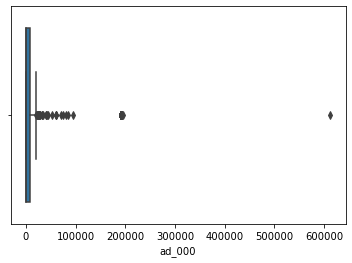

In [31]:
#sns.boxplot(high_data[highest_var[3]])
sns.boxplot(df_new[highest_var[3]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dh_000'>

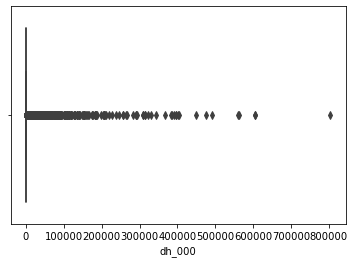

In [32]:
#sns.boxplot(high_data[highest_var[3]])
sns.boxplot(df_new[highest_var[4]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dj_000'>

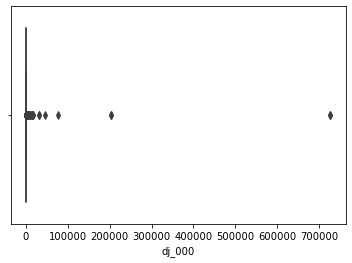

In [33]:
sns.boxplot(df_new[highest_var[5]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ag_000'>

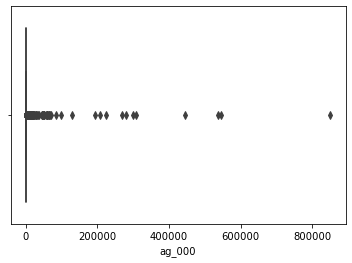

In [34]:
sns.boxplot(df_new[highest_var[6]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='as_000'>

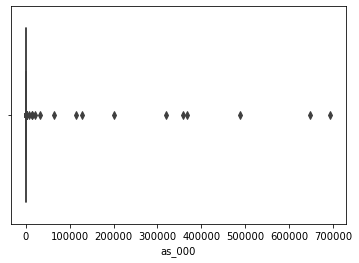

In [35]:
sns.boxplot(df_new[highest_var[7]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ay_009'>

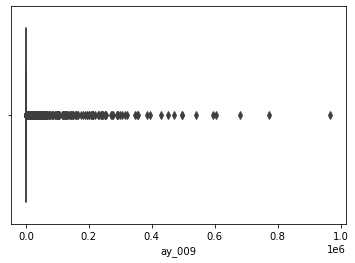

In [36]:
sns.boxplot(df_new[highest_var[8]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='az_009'>

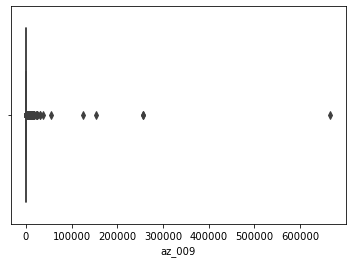

In [37]:
sns.boxplot(df_new[highest_var[9]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ak_000'>

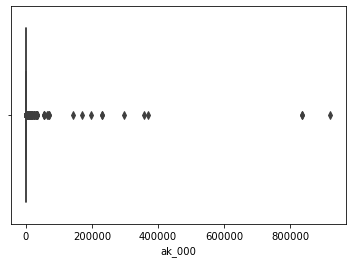

In [38]:
sns.boxplot(df_new[highest_var[10]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='au_000'>

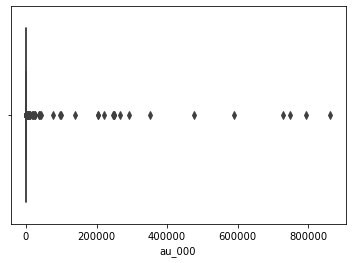

In [39]:
sns.boxplot(df_new[highest_var[11]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ch_000'>

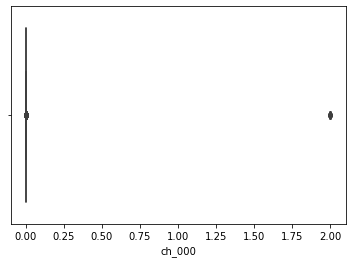

In [40]:
sns.boxplot(df_new[highest_var[12]])

(b) v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [14]:
y_train_2['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [15]:
y_test_2['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

The data set is imbalanced

(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [29]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train_2,y_train_2)
y_train_pred_2 = rfc.predict(x_train_2)
y_test_pred_2 = rfc.predict(x_test_2)
train_error = 1 - rfc.score(x_train_2, y_train_2)
print('train error is: %.6f' %train_error)
test_error = 1 - rfc.score(x_test_2, y_test_2)
print('test error is: %.6f' %test_error)

<ipython-input-29-2f31ccc9ad07>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_2,y_train_2)


train error is: 0.000000
test error is: 0.007938


In [62]:
print('train confusion matrix:')
confusion_matrix(y_train_2, y_train_pred_2)

train confusion matrix:


array([[59000,     0],
       [    0,  1000]])

In [63]:
print('test confusion matrix:')
confusion_matrix(y_test_2, y_test_pred_2)

test confusion matrix:


array([[15604,    21],
       [  106,   269]])

train set ROC AUC: 1.000


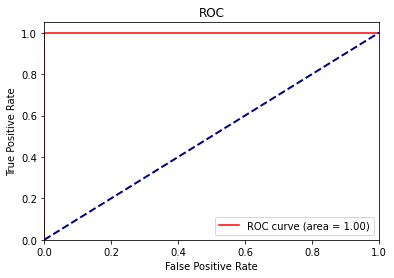

In [32]:
bilb = sklearn.preprocessing.LabelBinarizer()
y_train_new = bilb.fit_transform(y_train_2)
y_train_pred_new = bilb.fit_transform(y_train_pred_2)
fpr, tpr, threshold = roc_curve(y_train_new, y_train_pred_new)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

test set ROC AUC: 0.858


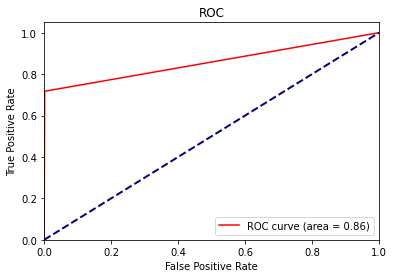

In [33]:
y_test_new = bilb.fit_transform(y_test_2)
y_test_pred_new = bilb.fit_transform(y_test_pred_2)
fpr, tpr, threshold = roc_curve(y_test_new, y_test_pred_new)
r_ac = auc(fpr, tpr)
print('test set ROC AUC: %.3f' %r_ac)
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [71]:

mis_train = 1 - accuracy_score(y_train_2, y_train_pred_2)
mis_test = 1 - accuracy_score(y_test_2, y_test_pred_2)
print('misclassification of training: %.3f' %mis_train)
print('misclassification of testing: %.3f' %mis_test)

misclassification of training: 0.000
misclassification of testing: 0.008


In [72]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0, oob_score=True)
rfc.fit(x_train_2, y_train_2)
outbag = 1 - rfc.oob_score_
print('out of bag error: %.3f' %outbag)

<ipython-input-72-feaf61c9c5a7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_2, y_train_2)


out of bag error: 0.006


(d)Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [35]:
rfcd = RandomForestClassifier(n_estimators=100,random_state=0, class_weight='balanced')
rfcd.fit(x_train_2, y_train_2)
train_error = 1 - rfcd.score(x_train_2, y_train_2)
test_error = 1 - rfcd.score(x_test_2, y_test_2)
y_train_pred = rfcd.predict(x_train_2)
y_test_pred = rfcd.predict(x_test_2)
print('train error is: %.3f' %train_error)
print('test error is: %.3f' %test_error)

<ipython-input-35-c757fc948764>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcd.fit(x_train_2, y_train_2)


train error is: 0.000
test error is: 0.011


In [74]:
print('train confusion matrix:')
confusion_matrix(y_train_2, y_train_pred)

train confusion matrix:


array([[59000,     0],
       [    0,  1000]])

In [76]:
print('test confusion matrix:')
confusion_matrix(y_test_2, y_test_pred)

test confusion matrix:


array([[15616,     9],
       [  161,   214]])

train set ROC AUC: 1.000


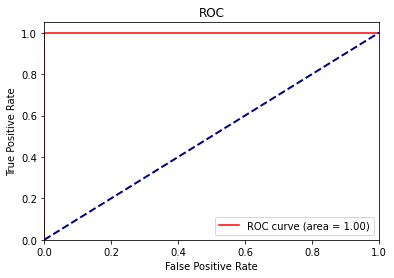

In [36]:
bilb = sklearn.preprocessing.LabelBinarizer()
y_train_new = bilb.fit_transform(y_train_2)
y_train_pred_new = bilb.fit_transform(y_train_pred)
fpr, tpr, threshold = roc_curve(y_train_new, y_train_pred_new)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

test set ROC AUC: 0.785


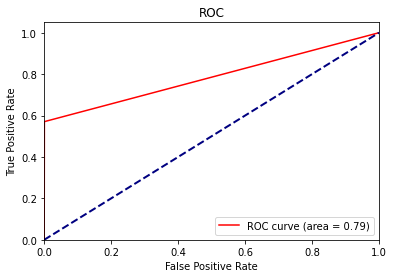

In [37]:
y_test_new = bilb.fit_transform(y_test_2)
y_test_pred_new = bilb.fit_transform(y_test_pred)
fpr, tpr, threshold = roc_curve(y_test_new, y_test_pred_new)
r_ac = auc(fpr, tpr)
print('test set ROC AUC: %.3f' %r_ac)
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [79]:
mis_train = 1 - accuracy_score(y_train_2, y_train_pred)
mis_test = 1 - accuracy_score(y_test_2, y_test_pred)
print('misclassification of training: %.3f' %mis_train)
print('misclassification of testing: %.3f' %mis_test)

misclassification of training: 0.000
misclassification of testing: 0.011


In [80]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0, oob_score=True, class_weight='balanced')
rfc.fit(x_train_2, y_train_2)
outbag = 1 - rfc.oob_score_
print('out of bag error: %.3f' %outbag)

<ipython-input-80-1a6d9ca9477d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_2, y_train_2)


out of bag error: 0.008


(e) Model Trees

Train set

In [9]:
train_new_data = pd.concat([y_train_2, x_train_2],axis=1)
train_new_data.columns=train_2.columns
train_new_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [10]:
test_new_data = pd.concat([y_test_2, x_test_2],axis=1)
test_new_data.columns=test_2.columns
test_new_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [11]:
train_new_data.to_csv('weka_training_set.csv', index=False)
test_new_data.to_csv('weka_testing_set.csv', index=False)

In [9]:
jvm.start(packages=True)
#jvm.stop()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/opt/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar', '/opt/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [17]:
train = converters.load_any_file('weka_training_set.csv')
train.class_is_first()

In [18]:
cla = Classifier(classname='weka.classifiers.trees.LMT')
evaluate = Evaluation(train)
evaluate.crossvalidate_model(classifier=cla, data=train, num_folds=5,rnd=Random(2))

[[58841.   159.]
 [  334.   666.]]
99.17833333333333

Correctly Classified Instances       59507               99.1783 %
Incorrectly Classified Instances       493                0.8217 %
Kappa statistic                          0.7257
Mean absolute error                      0.0116
Root mean squared error                  0.0818
Relative absolute error                 35.2408 %
Root relative squared error             63.9059 %
Total Number of Instances            60000     



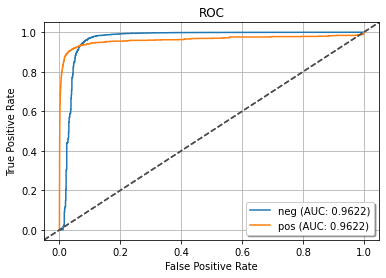

In [19]:
print(evaluate.confusion_matrix)
print(evaluate.percent_correct)
print(evaluate.summary())
plcls.plot_roc(evaluate, class_index=[0, 1], wait=True)

test set

In [14]:
test = converters.load_any_file('weka_testing_set.csv')
test.class_is_first()

In [15]:
cla = Classifier(classname='weka.classifiers.trees.LMT')
evaluate = Evaluation(test)
evaluate.crossvalidate_model(classifier=cla, data=train, num_folds=5,rnd=Random(2))

[[58841.   159.]
 [  334.   666.]]
99.17833333333333

Correctly Classified Instances       59507               99.1783 %
Incorrectly Classified Instances       493                0.8217 %
Kappa statistic                          0.7257
Mean absolute error                      0.0116
Root mean squared error                  0.0818
Relative absolute error                 35.2408 %
Root relative squared error             63.9059 %
Total Number of Instances            60000     



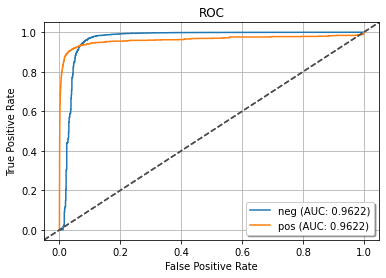

In [16]:
print(evaluate.confusion_matrix)
print(evaluate.percent_correct)
print(evaluate.summary())
plcls.plot_roc(evaluate, class_index=[0, 1], wait=True)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [10]:
smt = SMOTE()
x, y = smt.fit_resample(x_train_2, y_train_2)
x_new = pd.DataFrame(x)
y_new = pd.DataFrame(y)
smt_train = pd.concat([y_new, x_new], axis=1)
smt_train.columns = train_2.columns
smt_train.to_csv('train_smt.csv',index=False)

In [11]:
smt = SMOTE()
x, y = smt.fit_resample(x_test_2, y_test_2)
x_new = pd.DataFrame(x)
y_new = pd.DataFrame(y)
smt_test = pd.concat([y_new, x_new], axis=1)
smt_test.columns = test_2.columns
smt_test.to_csv('test_smt.csv',index=False)

In [15]:
import arff
arff.dump('smt_train.arff'
      , train_2.values
      , relation='relation name'
      , names=train_2.columns)

In [16]:
arff.dump('smt_test.arff'
      , test_2.values
      , relation='relation name'
      , names=train_2.columns)

In [11]:
from weka.classifiers import FilteredClassifier
from weka.filters import Filter

SMOTE Train set

In [13]:
train_smt = converters.load_any_file('train_smt.csv')
train_smt.class_is_first()
packages.install_package("SMOTE")
fil = Filter(classname="weka.filters.supervised.instance.SMOTE",options=["-C", "1"])
cla = Classifier(classname='weka.classifiers.trees.LMT')
fc = FilteredClassifier()
fc.filter = fil
fc.classifier = cla
eva = Evaluation(train_smt)
eva.crossvalidate_model(classifier=cla, data=train_smt, num_folds=5,rnd=Random(2))

[[57961.  1039.]
 [  727. 58273.]]
98.50338983050847

Correctly Classified Instances      116234               98.5034 %
Incorrectly Classified Instances      1766                1.4966 %
Kappa statistic                          0.9701
Mean absolute error                      0.0249
Root mean squared error                  0.112 
Relative absolute error                  4.9784 %
Root relative squared error             22.4011 %
Total Number of Instances           118000     



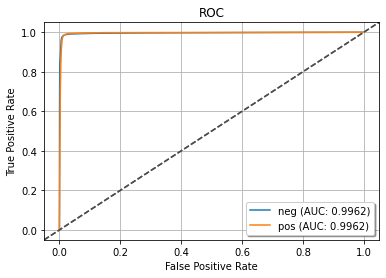

In [15]:
print(eva.confusion_matrix)
print(eva.percent_correct)
print(eva.summary())
plcls.plot_roc(eva, class_index=[0, 1], wait=True)

SMOTE Test set

In [15]:
test_smt = converters.load_any_file('test_smt.csv')
test_smt.class_is_first()
packages.install_package("SMOTE")
fil = Filter(classname="weka.filters.supervised.instance.SMOTE",options=["-C", "1"])
cla = Classifier(classname='weka.classifiers.trees.LMT')
fc = FilteredClassifier()
fc.filter = fil
fc.classifier = cla
eva = Evaluation(test_smt)
eva.crossvalidate_model(classifier=cla, data=train_smt, num_folds=5,rnd=Random(2))

[[57961.  1039.]
 [  727. 58273.]]
98.50338983050847

Correctly Classified Instances      116234               98.5034 %
Incorrectly Classified Instances      1766                1.4966 %
Kappa statistic                          0.9701
Mean absolute error                      0.0249
Root mean squared error                  0.112 
Relative absolute error                  4.9784 %
Root relative squared error             22.4011 %
Total Number of Instances           118000     



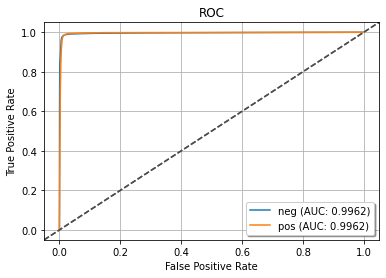

In [16]:
print(eva.confusion_matrix)
print(eva.percent_correct)
print(eva.summary())
plcls.plot_roc(eva, class_index=[0, 1], wait=True)

# ISLR 6.8.3

(a) iv. Steadily decrease. When beta is closed to 0, the training error increases and reaches the maximum point. In this case, the beta will increase as the s increases. Therefore, the training RSS will decrease.

(b) ii. Decrease initially, and then eventually start increasing in a U shape. The flexibility of the model will increase as the value of s increase. Therefore the test RSS will be in U shape.

(c) iii. Beta value has a positive relationship with variance. The value s has a positive relationship with variance as well. Therefore, the variance will increase steadily as increasing in s.

(d) iv.Steadily decrease. The flexibility increases as the s value increases. Therefore, the bias decrease.

(e) v. Remain constant. Because s value does not determine irreducible error.

# ISLR, 6.8.5

(a) (y1−b1x1−b2x1)^2+(y2−b1x2−b2x2)^2+λ(b'1+b'2)

(b) b1(x1^2+x2^2+λ)+b2(x1^2+x2^2)=y1x1+y2x2

(c) (y1−b1x1−b2x1)^2+(y2−b1x2−b2x2)^2+λ(|b'1|+|b'2|)

(d) 2[y1−(b1+b2)x1]^2 >= 0

b1+b2=s with b1, b2 >= 0 and b1+b2=−s with b1, b2 <= 0

# ISLR 8.4.5

majority vote approach: 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75 represents: G, G, G, G, R, R, R, R, R, R ==> Red

 choose red

average probability: mean = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75) / 10 = 0.45

choose green

# ISLR 9.7.3

(a)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

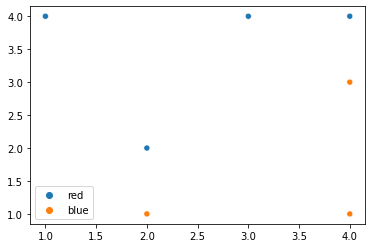

In [17]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
sns.scatterplot(x1, x2, hue = colors)

(b)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


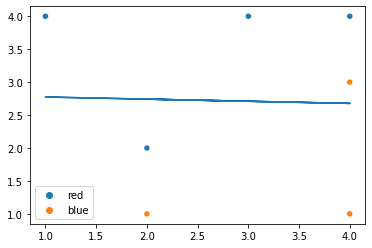

In [18]:
sns.scatterplot(x1, x2, hue = colors)
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
x1 = np.array(x1)
x2 = np.array(x2)
model = LinearRegression()
model.fit(x1.reshape(-1, 1),x2.reshape(-1, 1))
predictions = model.predict(x1.reshape(-1, 1))
#import matplotlib
#matplotlib.pyplot.scatter(x1,x2,'o')
# change here
#plt.plot(x1, x2)
plt.plot(x1, predictions, '-')
plt.show()

(c)

x1 − x2 − 0.5 < 0

beta0 = -0.5

beta1 = 1

beta2 = -1

(d)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


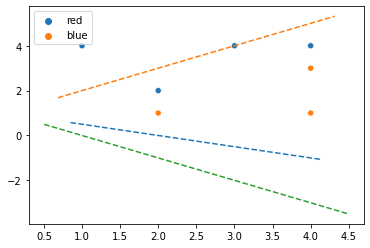

In [19]:
sns.scatterplot(x1, x2, hue = colors)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
abline(-0.5, 1)
abline(1, 1)
abline(-1, 1)

(e)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


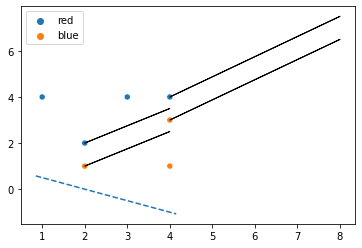

In [20]:
sns.scatterplot(x1, x2, hue = colors)
abline(-0.5, 1)
#abline(1, 1)
#abline(-1, 1)
plt.arrow(2, 1, 2, 1.5)
plt.arrow(2, 2, 2, 1.5)
plt.arrow(4, 4, 4, 3.5)
plt.arrow(4, 3, 4, 3.5)

(f)

Moving (4,1) will not affect the maximal margin hyperplane because it is at the outside of margin.

(g)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


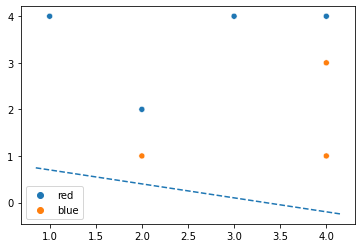

In [21]:
sns.scatterplot(x1, x2, hue = colors)
abline(-0.3, 1)

(h)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

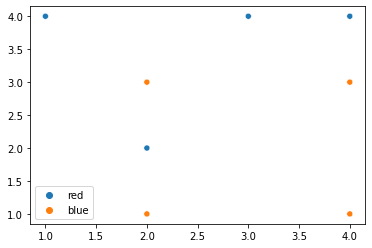

In [22]:
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 3]
colors = ["red", "red", "red", "red", "blue", "blue", "blue", "blue"]
sns.scatterplot(x1, x2, hue = colors)

Imputer: https://scikit-learn.org/0.18/modules/generated/sklearn.preprocessing.Imputer.html
Ridgecv: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
SelectFromModel: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
PCR: https://www.statology.org/principal-components-regression-in-python/
XGBRegressor: https://xgboost.readthedocs.io/en/latest/python/python_api.html
weka converter: https://fracpete.github.io/python-weka-wrapper/weka.core.html#module-weka.core.converters
ROC AUC PLOT: https://fracpete.github.io/python-weka-wrapper/examples.html
SMOTE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/